# Linear Regression using Gradient Descent

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Loading and Analysing Data

In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [5]:
def encode(df):
    labelEnc = LabelEncoder()
    for c in df.columns:
        if df[c].dtypes == 'object':
            df[c] = labelEnc.fit_transform(df[c])
    return df


df1 = encode(df)
df1 = df1.drop('region',1)
df1.head()

C:\Users\Om Surj\AppData\Local\Temp\ipykernel_11100\1751715150.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df1 = df1.drop('region',1)


,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [6]:
df1.describe()

,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


#### Visualize Data

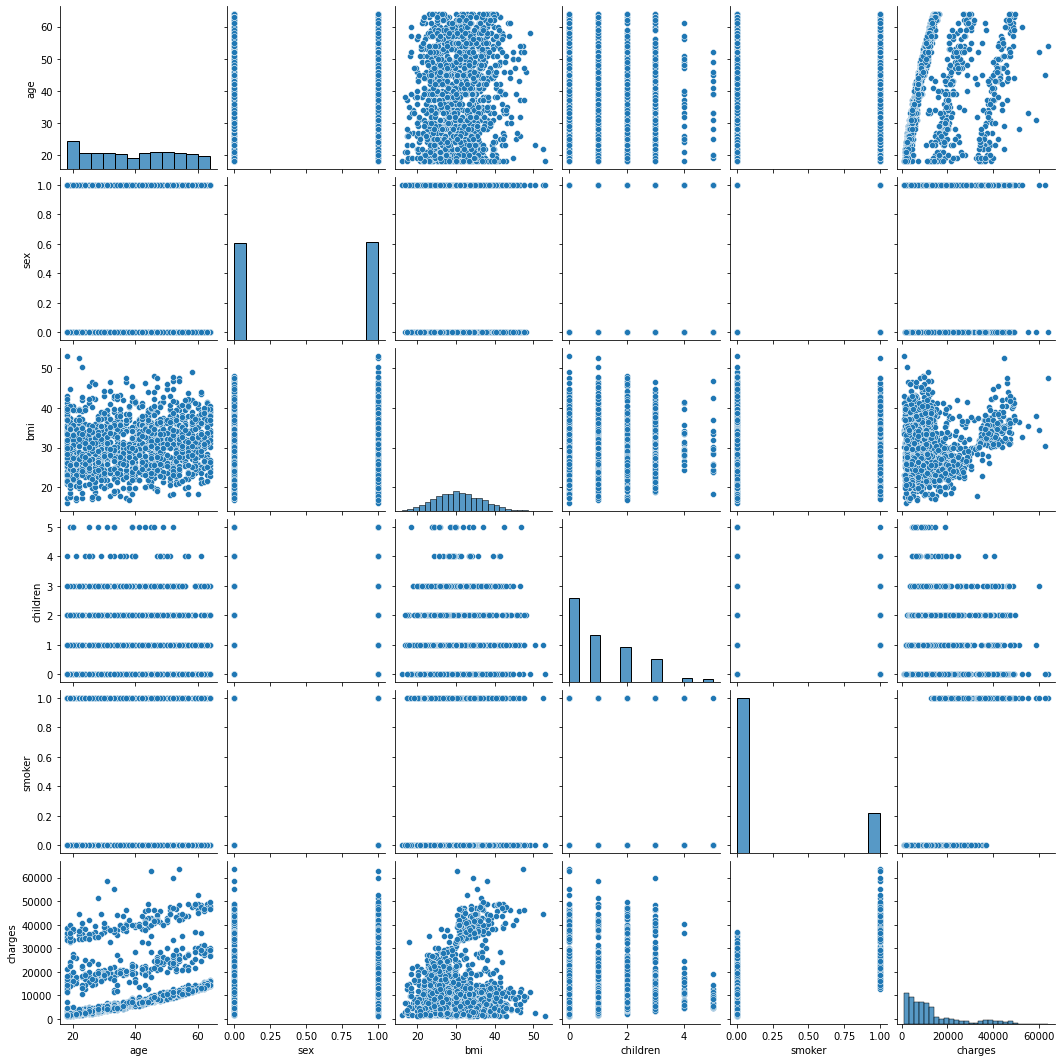

In [7]:
sns.pairplot(df1)

C:\Users\Om Surj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

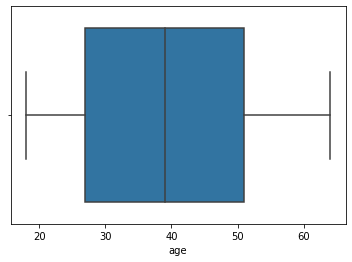

In [8]:
sns.boxplot(df1['age'])

C:\Users\Om Surj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

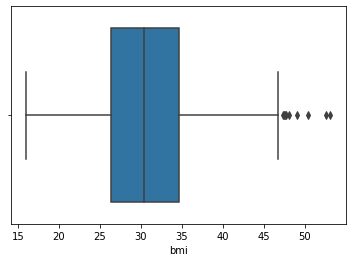

In [9]:
sns.boxplot(df1['bmi'])

C:\Users\Om Surj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

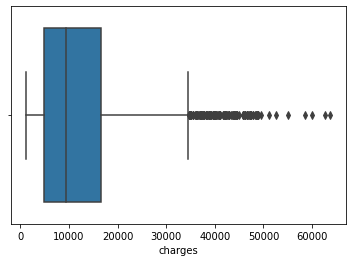

In [10]:
sns.boxplot(df1['charges'])

<AxesSubplot:xlabel='age', ylabel='charges'>

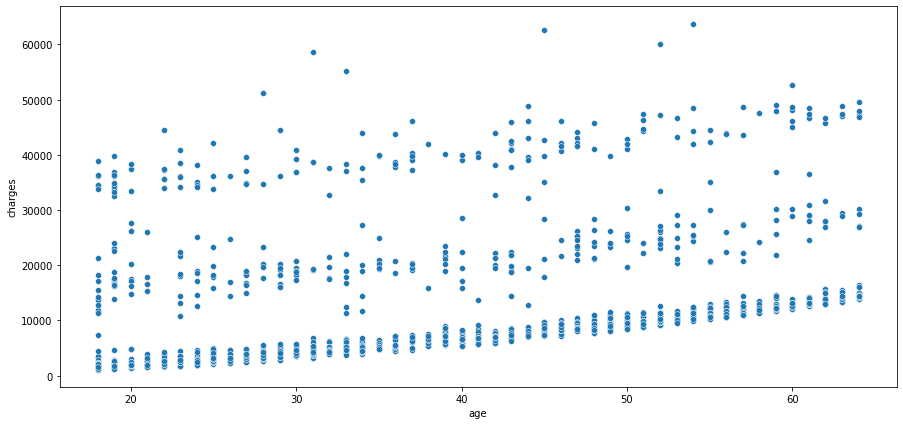

In [11]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='age',y='charges', data=df1)

<AxesSubplot:xlabel='age', ylabel='charges'>

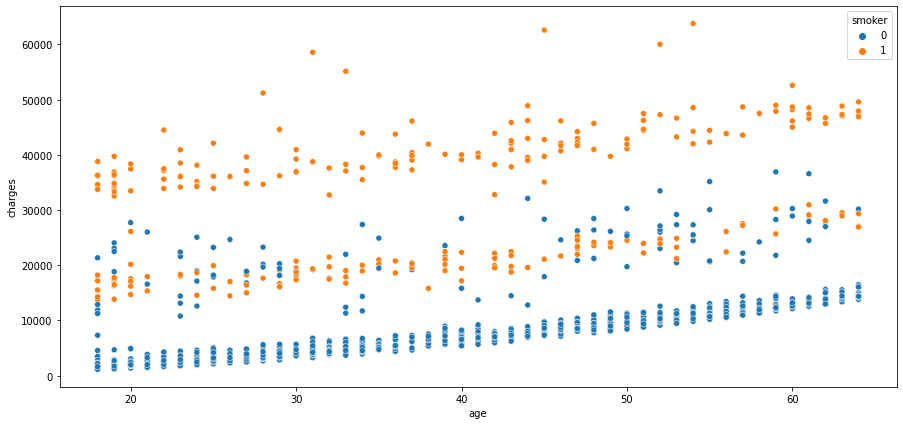

In [12]:
plt.figure(figsize=(15, 7))
sns.scatterplot(x='age',y='charges', hue = 'smoker', data = df1)

In [13]:
df1.corr()

,age,sex,bmi,children,smoker,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,0.787234
charges,0.298308,0.058044,0.198401,0.067389,0.787234,1.000000


C:\Users\Om Surj\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 67.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='smoker', ylabel='charges'>

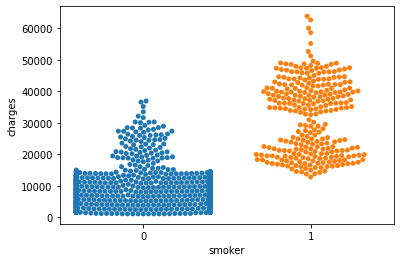

In [14]:
sns.swarmplot(x='smoker',y='charges',data=df1)

In [15]:
x = df1[['age','bmi','smoker']]
y = df1['charges']

## Model
#### Cost Function

In [16]:
def costFunc(x, y, theta, b):
    m = len(y)
    y_pred = x.dot(theta) + b
    error = (y_pred - y)**2
    return 1/(2*m) * np.sum(error)

#### Scaling and Transforming X

In [17]:
sc = StandardScaler()
X = sc.fit_transform(x)

In [18]:
X_train,X_test,Y_train, Y_test = train_test_split(X,y,test_size=0.3)

In [19]:
theta = np.zeros(X_train.shape[1])

#### Gradient Descent

In [20]:
def GradientDescent(x, y, theta, b, alpha, epochs):
    cost_list = [0] * epochs

    for epoch in range(epochs):
        loss = x.dot(theta) + b - y

        weight_gradient = x.T.dot(loss) / len(y)
        bias_gradient = np.sum(loss) / len(y)

        theta = theta - alpha*weight_gradient
        b = b - alpha*bias_gradient

        cost = costFunc(x, y, theta, b)
        cost_list[epoch] = cost

        if (epoch % 50 == 0):
            print(f"epock {epoch}: Cost = {cost}")

    return theta, b, cost_list


In [21]:
newTheta, b, costs = GradientDescent(X_train, Y_train, theta, b = 0, alpha = 0.006, epochs = 1500)

epock 0: Cost = 154311876.2004284
epock 50: Cost = 93979844.07058614
epock 100: Cost = 60412036.439372085
epock 150: Cost = 41730681.13710121
epock 200: Cost = 31331344.526219465
epock 250: Cost = 25540841.639987003
epock 300: Cost = 22315751.01697667
epock 350: Cost = 20519015.208960492
epock 400: Cost = 19517759.707318075
epock 450: Cost = 18959642.00876523
epock 500: Cost = 18648449.79638284
epock 550: Cost = 18474887.409293633
epock 600: Cost = 18378057.73667851
epock 650: Cost = 18324020.974976327
epock 700: Cost = 18293856.186936237
epock 750: Cost = 18277012.253268916
epock 800: Cost = 18267603.73403775
epock 850: Cost = 18262346.760054998
epock 900: Cost = 18259408.504833218
epock 950: Cost = 18257765.704660665
epock 1000: Cost = 18256846.898402385
epock 1050: Cost = 18256332.843354892
epock 1100: Cost = 18256045.14039347
epock 1150: Cost = 18255884.06446475
epock 1200: Cost = 18255793.851036053
epock 1250: Cost = 18255743.307149995
epock 1300: Cost = 18255714.97851431
epock 13

##### Plotting Convergence 

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')


Text(0, 0.5, 'Cost')

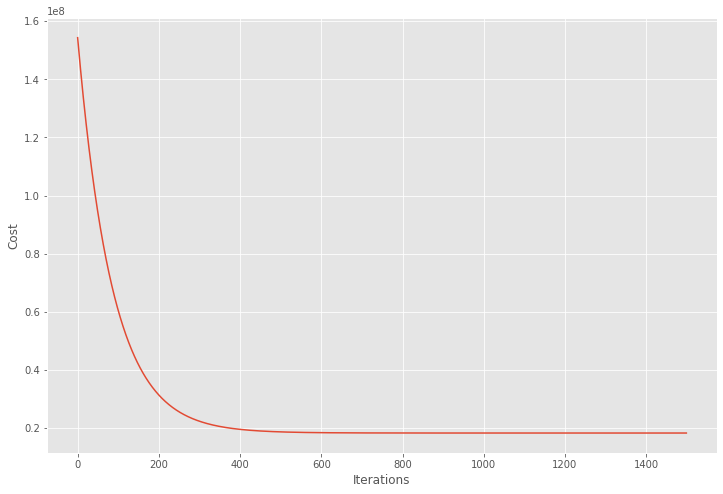

In [23]:
plt.plot(costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

#### Making Prediction and Testing Accuracy

In [24]:
def predict(X, w, b):
    return X.dot(w) + b


y_pred = predict(X_test, newTheta, b)

In [25]:
def r2(y_,y):
    sst = np.sum((y-y.mean())**2)
    ssr = np.sum((y_-y)**2)
    r2 = 1-(ssr/sst)
    return(r2)

r2(y_pred,Y_test)

0.7624215721997372